In [2]:
from collections import Counter, namedtuple
from tqdm import tqdm_notebook as tqdm
from util import (
    calculate_score,
    feature_to_target,
    load_data,
    target_to_feature,
)

import pandas as pd
import numpy as np
import matplotlib.pylab as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

TRAIN_FILE = './data/train.csv'
TEST_FILE = './data/test.csv'
RANDOM_STATE = 42

In [3]:
train_df, test_df = load_data(TRAIN_FILE, TEST_FILE, None, None)
train_df.head()

,id,epoch,sat_id,x,y,z,Vx,Vy,Vz,x_sim,y_sim,z_sim,Vx_sim,Vy_sim,Vz_sim
0,0,2014-01-01 00:00:00.000,0,-8855.823863,13117.780146,-20728.353233,-0.908303,-3.808436,-2.022083,-8843.131454,13138.221690,-20741.615306,-0.907527,-3.804930,-2.024133
1,1,2014-01-01 00:46:43.000,0,-10567.672384,1619.746066,-24451.813271,-0.302590,-4.272617,-0.612796,-10555.500066,1649.289367,-24473.089556,-0.303704,-4.269816,-0.616468
2,2,2014-01-01 01:33:26.001,0,-10578.684043,-10180.467460,-24238.280949,0.277435,-4.047522,0.723155,-10571.858472,-10145.939908,-24271.169776,0.274880,-4.046788,0.718768
3,3,2014-01-01 02:20:09.001,0,-9148.251857,-20651.437460,-20720.381279,0.715600,-3.373762,1.722115,-9149.620794,-20618.200201,-20765.019094,0.712437,-3.375202,1.718306
4,4,2014-01-01 03:06:52.002,0,-6719.092336,-28929.061629,-14938.907967,0.992507,-2.519732,2.344703,-6729.358857,-28902.271436,-14992.399986,0.989382,-2.522618,2.342237


In [5]:
def get_sat_data(df, sat_id):
    return df[df.sat_id == sat_id]

In [6]:
sat_train = get_sat_data(train_df, 0)
x = sat_train.x.values
x_sim = sat_train.x_sim.values
x_diff = x - x_sim

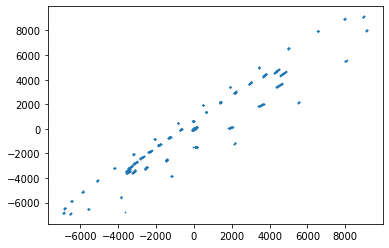

In [7]:
plt.scatter(x_diff[:-1], x_diff[1:], s=0.5)

In [35]:
import statsmodels.tsa.stattools as stat

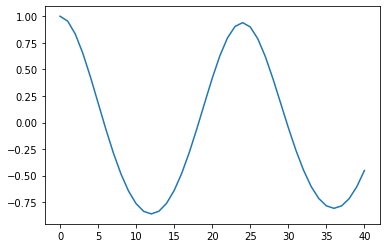

In [37]:
plt.plot(stat.acf(x_diff, fft=False))

In [45]:
result = pd.Timedelta(0)
for i in range(1, 27):
    result += sat_train.epoch[i] - sat_train.epoch[i - 1]
result

Timedelta('0 days 20:14:38.013000')

In [76]:
def calc_distances(sat_train, variables, origin_id):
    points = sat_train[variables].values
    origin = points[origin_id]
    distances = points - origin
    return np.sqrt(np.sum(distances * distances, axis=1))

In [97]:
ORIGIN_ID = 1
distances_sim = calc_distances(sat_train, ['x_sim', 'y_sim', 'z_sim'], ORIGIN_ID)
distances = calc_distances(sat_train, ['x', 'y', 'z'], ORIGIN_ID)

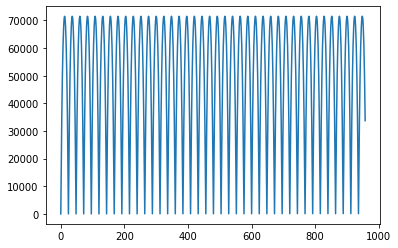

In [81]:
plt.plot(distances_sim)

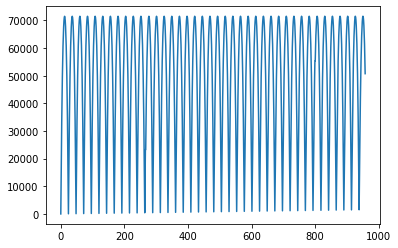

In [82]:
plt.plot(distances)

In [94]:
a = distances[distances < 10000]
a

array([   0.        ,   39.96889874,   79.6837863 ,  118.37955429,
        156.11342103,  192.85747237,  228.56825118,  264.17529292,
        299.63233706,  335.66534278,  372.23495576,  409.616655  ,
        447.70293548,  486.5765916 ,  526.15055591,  565.93014088,
        606.34478603,  646.71955294,  687.34874123,  727.89216388,
        768.22631668,  808.3713113 ,  848.19972438,  887.7922287 ,
        926.73885667,  965.55238079, 1003.71896052, 1041.69414068,
       1079.38116465, 1116.70651775, 1154.14822187, 1191.63332773,
       1229.59575054, 1267.84148141, 1306.82303114, 1346.02816743,
       1385.49285448, 1424.66049002, 1462.75456788, 1499.92748085])

In [96]:
x = sat_train.x.values[distances < 10000]
x[1:] - x[:-1]

array([ 9.47004692,  9.1894442 ,  8.78550841,  8.57699852,  8.58375698,
        8.58879179,  8.97145736,  9.19481311,  9.63673739,  9.87973126,
       10.16494316, 10.30656661, 10.37115704, 10.46451059, 10.28383588,
       10.34358864, 10.1290377 , 10.10795745,  9.987413  ,  9.8996676 ,
        9.87455195,  9.79375913,  9.88723722,  9.76929845,  9.94586715,
        9.90173934, 10.0456729 , 10.16196195, 10.21803399, 10.42924776,
       10.48201502, 10.70232994, 10.65091491, 10.74057425, 10.52443971,
       10.29622426,  9.9874704 ,  9.50173413,  9.31731482])

In [98]:
x = sat_train.x.values[distances < 10000]
x[1:] - x[:-1]

array([2.07643056, 1.75291998, 1.40349764, 1.23331531, 1.32276329,
       1.42669824, 1.83547543, 2.11159244, 2.53329611, 2.77779238,
       3.02201759, 3.14766211, 3.16063431, 3.21757923, 3.03152895,
       3.02412596, 2.81054211, 2.73159386, 2.59511178, 2.4823247 ,
       2.44123935, 2.34546766, 2.43139696, 2.35528931, 2.52487963,
       2.55812082, 2.72707372, 2.91308806, 3.04459999, 3.29852117,
       3.39648748, 3.61171004, 3.5614056 , 3.56839677, 3.31114504,
       2.98923102, 2.64803662, 2.19709189, 2.05045845])

In [101]:
sat_train.x.values[:3]

array([ -8855.8238626 , -10567.67238391, -10578.68404349])

In [102]:
sat_train.Vx.values[:3]

array([-0.90830256, -0.30259012,  0.27743545])

In [103]:
sat_train.epoch[:3]

0   2014-01-01 00:00:00.000
1   2014-01-01 00:46:43.000
2   2014-01-01 01:33:26.001
Name: epoch, dtype: datetime64[ns]

In [106]:
(1400 * -0.90830256 + 1403 * -0.30259012) + -8855.8238626

-10551.98138496

In [92]:
b = distances_sim[distances_sim < 10000]
b

array([  0.        ,   2.06955011,   4.36278554,   7.00828123,
        10.09415631,  13.65368972,  17.64412297,  21.9398598 ,
        26.34748478,  30.63902412,  34.59318669,  38.03044995,
        40.83642745,  42.97270523,  44.47355777,  45.43339685,
        45.99022147,  46.3058139 ,  46.54693228,  46.87079905,
        47.41378704,  48.28542951,  49.56837839,  51.31979985,
        53.57221071,  56.33202684,  59.57282655,  63.2269491 ,
        67.18163176,  71.28263255,  75.34974945,  79.20501023,
        82.7063713 ,  85.78030615,  88.44538202,  90.81632794,
        93.0859442 ,  95.48827838,  98.24901182, 101.53674401])

# ===== ANALYZE VELOCITIES =====

In [8]:
vx = sat_train.Vx.values
vx_sim = sat_train.Vx_sim.values

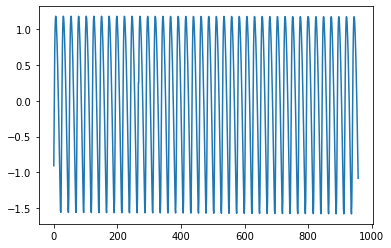

In [11]:
plt.plot(vx)

In [51]:
from sklearn.linear_model import LinearRegression

def check_is_trended(values, is_trend_coef):
    reg = LinearRegression()
    reg.fit(np.arange(values.size).reshape(-1, 1), values)
    coef = reg.coef_[0]
    return is_trend_coef(coef)

def find_trended_satellites(train_df, column, is_trend_coef):
    sat_ids = []
    for sat_id in set(train_df.sat_id.values):
        sat_data = get_sat_data(train_df, sat_id)
        if check_is_trended(sat_data[column].values, is_trend_coef):
            sat_ids.append(sat_id)
    return sat_ids

def count_trended_velocities(train_df):
    result = 0
    for velocity in ['Vx', 'Vy', 'Vz']:
        trended_ids = find_trended_satellites(train_df, velocity, lambda coef: abs(coef) >= 1e-2)
        result += len(trended_ids)
    return result

In [52]:
count_trended_velocities(train_df)

0

# ===== TRIGONOMETRIC POLYNOMIAL =====

In [298]:
from sklearn.linear_model import LinearRegression
from torch.autograd import Variable

import torch

class TrigPoly:
    def __init__(self, degree=1):
        self._degree = degree
        self._model = LinearRegression()
    
    def fit(self, time_diffs, y):
        X = self._transform_time_diffs(time_diffs)
        self._model = self._model.fit(X, y)
        return self

    def predict(self, time_diffs):
        X = self._transform_time_diffs(time_diffs)
        return self._model.predict(X)

    def _transform_time_diffs(self, time_diffs):
        time_diffs = time_diffs.reshape(-1, 1)
        to_stack = []
        for i in range(1, self._degree + 1):
            to_stack.append(np.cos(i * time_diffs))
            to_stack.append(np.sin(i * time_diffs))
        return np.hstack(to_stack)

class TrigBlock:
    def __init__(self, func):
        self._func = func
        self._intercept = Variable(torch.Tensor([np.random.rand()]), requires_grad=True)
        self._scaler = Variable(torch.Tensor([np.random.rand()]), requires_grad=True)
        self._period = Variable(torch.Tensor([np.random.rand()]), requires_grad=True)
        self._shift = Variable(torch.Tensor([np.random.rand()]), requires_grad=True)
        self._params = [self._intercept, self._scaler, self._period, self._shift]

    def eval(self, time_diffs):
        func_result = self._func(self._period * time_diffs + self._shift)
        return self._intercept + self._scaler * func_result

    def do_grad_step(self, lr):
        for param in self._params:
            param.data -= lr * param.grad.data

    def zero_grad(self):
        for param in self._params:
            param.grad.data.zero_()

class SimpleTrigBlock:
    def __init__(self, func):
        self._func = func
        self._period = Variable(torch.Tensor([np.random.rand()]), requires_grad=True)
        self._shift = Variable(torch.Tensor([np.random.rand()]), requires_grad=True)
        self._params = [self._period, self._shift]

    def eval(self, time_diffs):
        func_result = self._func(self._period * time_diffs + self._shift)
        return func_result

    def do_grad_step(self, lr):
        for param in self._params:
            param.data -= lr * param.grad.data

    def zero_grad(self):
        for param in self._params:
            param.grad.data.zero_()

class TrigModel:
    def __init__(self, lr=1e-4, batch_size=16, max_iter=300, tol=1e-4, random_state=None):
        self._lr = lr
        self._batch_size = batch_size
        self._max_iter = max_iter
        self._tol = tol
        if random_state is not None:
            np.random.seed(random_state)
        #self._sin = TrigBlock(torch.sin)
        #self._cos = TrigBlock(torch.cos)
        #self._blocks = [self._sin, self._cos]
        self._blocks = [SimpleTrigBlock(torch.sin)]

    def fit(self, time_diffs, y):
        prev_loss = None
        y = torch.Tensor(y.ravel())
        time_diffs = torch.Tensor(time_diffs.ravel())
        ids = np.arange(y.shape[0])
        for _ in range(self._max_iter):
            np.random.shuffle(ids)
            for batch_begin in range(0, time_diffs.shape[0], self._batch_size):
                batch_end = min(time_diffs.shape[0], batch_begin + self._batch_size)
                ids_batch = ids[batch_begin:batch_end]
                y_batch = y[ids_batch]
                t_batch = time_diffs[ids_batch]

                pred = self._eval(t_batch)
                loss = torch.mean((pred - y_batch).abs() / (pred.abs() + y_batch.abs()))

                loss.backward()
                self._do_grad_step()
                self._zero_grad()
                loss = loss.detach().numpy().ravel()[0]
            if prev_loss is None:
                prev_loss = loss
            elif np.abs(loss - prev_loss) < self._tol:
                break
        return self

    def predict(self, time_diffs):
        time_diffs = torch.Tensor(time_diffs.ravel())
        with torch.no_grad():
            return self._eval(time_diffs).numpy().ravel()

    def _eval(self, time_diffs):
        result = None
        for block in self._blocks:
            block_result = block.eval(time_diffs)
            result = block_result + result if result is not None else block_result
        return result

    def _do_grad_step(self):
        for block in self._blocks:
            block.do_grad_step(self._lr)

    def _zero_grad(self):
        for block in self._blocks:
            block.zero_grad()

def prepare_train_data(sat_data, velocity):
    ts_origin = sat_data.epoch[0]
    time_diffs = np.array([float((ts - ts_origin).total_seconds()) for ts in sat_data.epoch])
    y = np.array(sat_data[velocity].values)
    return time_diffs, y

def train_model(sat_data, velocity, degree):
    time_diffs, y = prepare_train_data(sat_data, velocity)
    regressor = TrigPoly(degree)
    return regressor.fit(time_diffs, y)

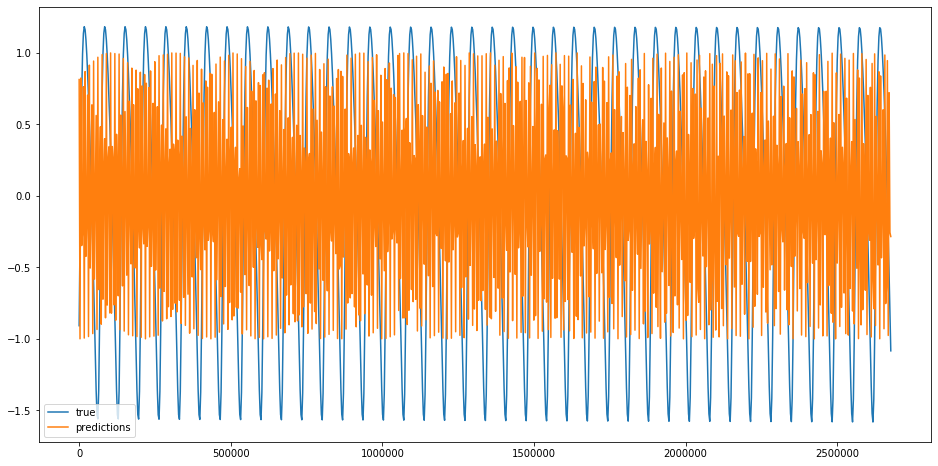

In [317]:
SAT_ID = 0
VEL = 'Vx'

sat_data = get_sat_data(train_df, SAT_ID)
time_diffs, y = prepare_train_data(sat_data, VEL)
model = TrigModel(lr=1e-7, max_iter=10000, random_state=RANDOM_STATE)
model = model.fit(time_diffs, y)

vels = sat_data[VEL].values

plt.figure(figsize=(16, 8))
plt.plot(time_diffs, vels, label='true')
plt.plot(time_diffs, model.predict(time_diffs), label='predictions')
plt.legend()

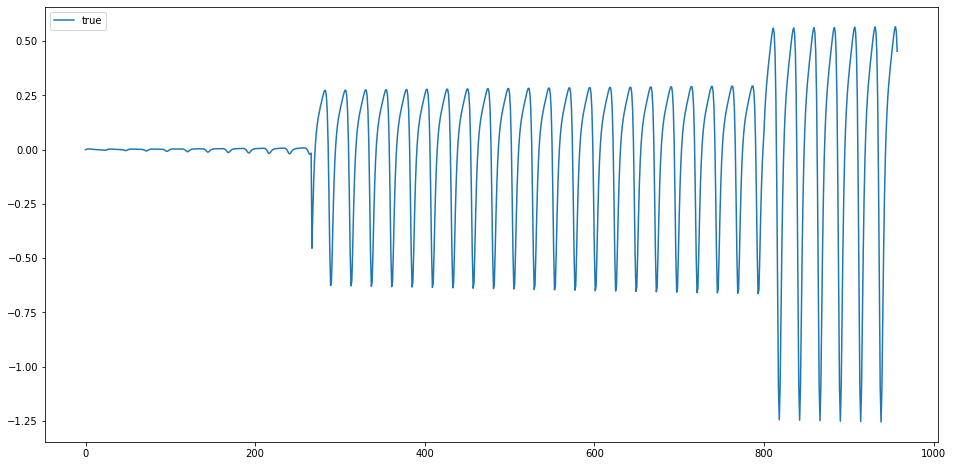

In [330]:
plt.figure(figsize=(16, 8))
plt.plot(sat_data.Vx - sat_data.Vx_sim, label='true')
plt.legend()

In [160]:
def score(lhs, rhs):
    smape = np.mean(np.abs(lhs - rhs) / (np.abs(lhs) + np.abs(rhs)))
    return 100 * (1 - smape)

In [161]:
score(sat_data.Vx_sim, sat_data.Vx)

79.02145122446856

In [316]:
score(model.predict(time_diffs), sat_data.Vx)

30.553612315967072